## Comparing Loss Components for Kang - Beta Vae 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re

In [2]:
os.getcwd()

'/mnt/home/icb/harshita.agarwala/models_seurat_beta_vae_noc'

In [3]:
#path='./models_dentate_beta_vae_noc/'
folders = os.listdir()
folders.sort(reverse=True)
print(folders)

['latent5_alpha50', 'latent5_alpha5', 'latent5_alpha20', 'latent5_alpha100', 'latent5_alpha1', 'Dentate_Graphs_losses.ipynb', 'Dentate_Graphs_dis-score.ipynb', '.ipynb_checkpoints']


# Latent 5

In [4]:

z_dims = []
alphas = []
kl_loss_last = []
recon_loss_last = []
vae_loss_last = []
active_units = []

for folder_name in folders:
    if "latent" in folder_name:
        z = re.search('latent(\d+)', folder_name)
        if int(z[1]) == 10:
            continue
        al = re.search('alpha(\d+)', folder_name)
        z_dims.append(int(z[1]))
        alphas.append(int(al[1]))
        df = pd.read_csv(folder_name+"/csv_logger.log")
        kl_loss_last.append(round(df.loc[df.index[-1],"kl_loss"],2))
        recon_loss_last.append(round(df.loc[df.index[-1],"recon_loss"],2))
        vae_loss_last.append(round(df.loc[df.index[-1],"loss"],2))
        count = 0
        for i in range(int(z[1])):
            col_name = "kl_loss_monitor"+str(i)
            if df.loc[df.index[-1],col_name] > 0.99:
                count = count + 1
        active_units.append(count)

In [5]:
print(active_units)
print(alphas)


[0, 2, 1, 0, 5]
[50, 5, 20, 100, 1]


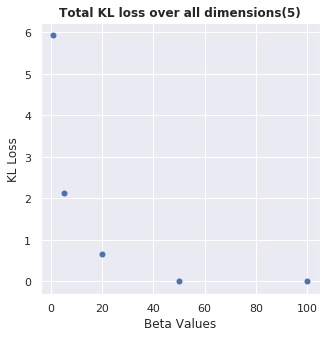

In [6]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
scatter1 = sns.scatterplot(alphas,kl_loss_last,linewidth=0)

scatter1.set_ylabel("KL Loss")
scatter1.set_xlabel("Beta Values")

scatter1.set_title("Total KL loss over all dimensions(5)", weight="bold")

plt.savefig("KL_loss_all_5.png",bbox_inches="tight")


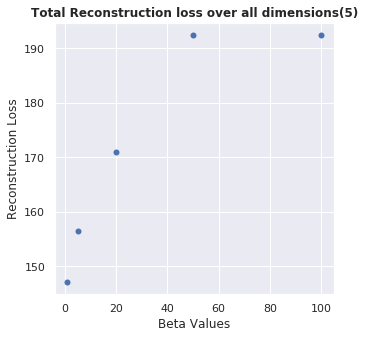

In [7]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
scatter1 = sns.scatterplot(alphas,recon_loss_last,linewidth=0)

scatter1.set_ylabel("Reconstruction Loss")
scatter1.set_xlabel("Beta Values")

scatter1.set_title("Total Reconstruction loss over all dimensions(5)", weight="bold")

plt.savefig("Recon_loss_all_5.png",bbox_inches="tight")


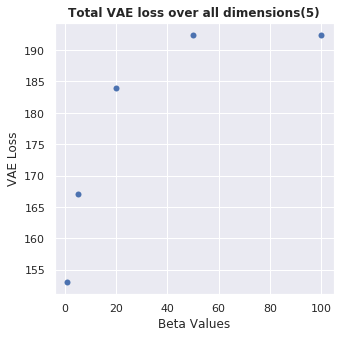

In [8]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
scatter1 = sns.scatterplot(alphas,vae_loss_last,linewidth=0)

scatter1.set_ylabel("VAE Loss")
scatter1.set_xlabel("Beta Values")
scatter1.set_title("Total VAE loss over all dimensions(5)", weight="bold")
plt.savefig("Vae_loss_all_5.png",bbox_inches="tight")